In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df = df.drop('id', axis=1)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [2]:
categorical_features = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']
unique_values = {col:df[col].unique() for col in categorical_features}

In [3]:
for col, values in unique_values.items():
    print(f"{col}: {values}")

gender: ['Male' 'Female' 'Other']
hypertension: [0 1]
heart_disease: [1 0]
ever_married: ['Yes' 'No']
work_type: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type: ['Urban' 'Rural']
smoking_status: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
stroke: [1 0]


In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [6]:
y = df['stroke']
y.value_counts(normalize=True) * 100

stroke
0    95.127202
1     4.872798
Name: proportion, dtype: float64

In [7]:
import plotly.express as px
px.bar(x=y.value_counts().index, y=y.value_counts(), color=y.value_counts().index)

In [8]:
numerical_features = ['age', 'avg_glucose_level', 'bmi']
df[numerical_features].describe()

,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,4909.000000
mean,43.226614,106.147677,28.893237
std,22.612647,45.283560,7.854067
min,0.080000,55.120000,10.300000
25%,25.000000,77.245000,23.500000
50%,45.000000,91.885000,28.100000
75%,61.000000,114.090000,33.100000
max,82.000000,271.740000,97.600000


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\ivang\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'avg_glucose_level'}>],
       [<Axes: title={'center': 'bmi'}>, <Axes: >]], dtype=object)

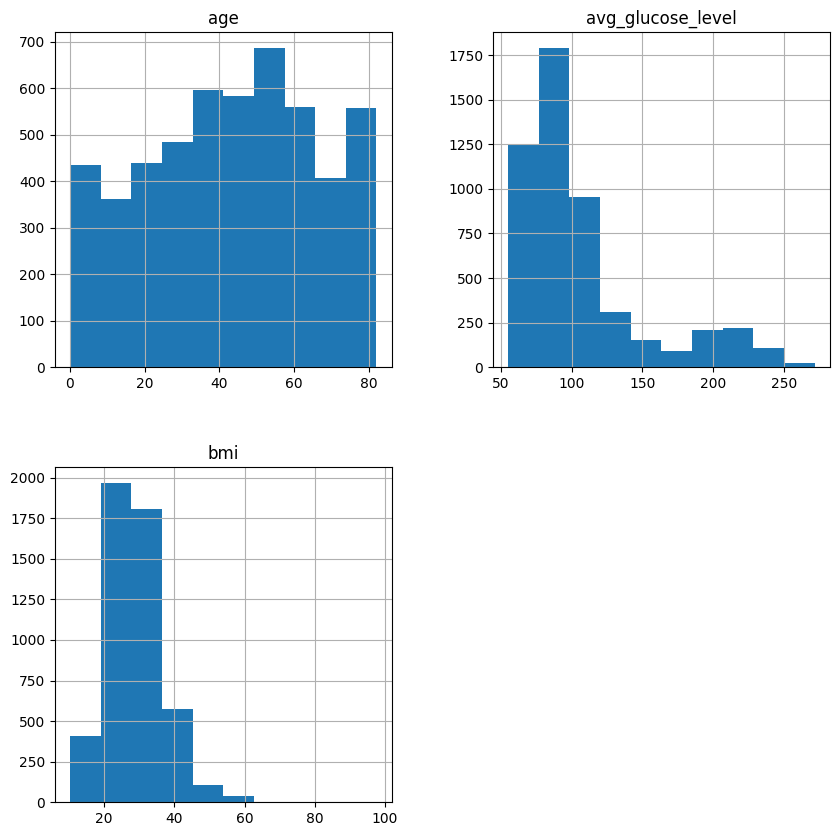

In [9]:
%pip install matplotlib
import matplotlib.pyplot as plt

df[numerical_features].hist(figsize=(10,10))

In [10]:
fig = px.histogram(df, x='gender', width=400)
fig.show()

In [11]:
male_ill_mean = round(df[df['gender'] == 'Male']['stroke'].mean()*100,2)
female_ill_mean = round(df[df['gender'] == 'Female']['stroke'].mean()*100,2)

female_ill_mean

np.float64(4.71)

In [12]:
female_ill_mean

np.float64(4.71)

In [13]:
fig = px.histogram(df, x='hypertension', width=400)
fig.show()

In [14]:
round(df[df['hypertension']==1]['stroke'].mean()*100, 2)

np.float64(13.25)

In [15]:
round(df[df['hypertension']==0]['stroke'].mean()*100, 2)

np.float64(3.97)

In [16]:
fig = px.histogram(df, x='heart_disease', width=400)
fig.show()

In [17]:
round(df[df['heart_disease']==1]['stroke'].mean()*100,2)

np.float64(17.03)

In [18]:
fig = px.histogram(df, x='work_type', width=400)
fig.show()

In [19]:
# Calcular el porcentaje de stroke por tipo de trabajo
stroke_by_work = df.groupby('work_type')['stroke'].mean() * 100

# Crear el gráfico de barras
fig = px.bar(
    x=stroke_by_work.index, 
    y=stroke_by_work.values,
    title='Porcentaje de Stroke por Tipo de Trabajo',
    labels={'x': 'Tipo de Trabajo', 'y': 'Porcentaje de Stroke (%)'},
    width=600
)

# Personalizar el diseño
fig.update_layout(
    xaxis_title="Tipo de Trabajo",
    yaxis_title="Porcentaje de Stroke (%)",
    showlegend=False
)

fig.show()

In [20]:
stroke_by_work.sort_values(ascending=False)

work_type
Self-employed    7.936508
Private          5.094017
Govt_job         5.022831
children         0.291121
Never_worked     0.000000
Name: stroke, dtype: float64

In [21]:
fig = px.histogram(df, x='Residence_type', width=400)
fig.show()

In [22]:
stroke_by_work = df.groupby('Residence_type')['stroke'].mean() * 100
stroke_by_work.sort_values(ascending=False)

Residence_type
Urban    5.200308
Rural    4.534606
Name: stroke, dtype: float64

In [23]:
fig = px.histogram(df, x='smoking_status', width=400)
fig.show()

In [24]:
stroke_by_smoke = df.groupby('smoking_status')['stroke'].mean() * 100
stroke_by_smoke.sort_values(ascending=False)

smoking_status
formerly smoked    7.909605
smokes             5.323194
never smoked       4.756871
Unknown            3.044041
Name: stroke, dtype: float64

In [ ]:
stroke_by_smoke = df.groupby('avg_glucose_level')['stroke'].mean() * 100
stroke_by_smoke.sort_values(ascending=False)

In [25]:
from sklearn.metrics import mutual_info_score

categorical_features = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']

for col in categorical_features:
    mi = mutual_info_score(df[col], df['stroke'])
    print(f"{col}: {mi:.2f}")


gender: 0.00
hypertension: 0.01
heart_disease: 0.01
ever_married: 0.01
work_type: 0.01
Residence_type: 0.00
smoking_status: 0.00
stroke: 0.19


In [26]:
df[numerical_features+['stroke']].corr()

,age,avg_glucose_level,bmi,stroke
age,1.000000,0.238171,0.333398,0.245257
avg_glucose_level,0.238171,1.000000,0.175502,0.131945
bmi,0.333398,0.175502,1.000000,0.042374
stroke,0.245257,0.131945,0.042374,1.000000


1. Weak positive relationship 0.25 between age and stroke.
2. Slight difference in avg. glucose levels between stroke & nostroke.
3. BMI shows no significant relation to stroke.
4. Hypertension increases stroke risk by 3.3x.
5. Males slighly more likely to have stroke than females.
6. Heart disease increases stroke risk by 4.07x.
7. Married individuals 5.7x more likely to have stroke.
8. Self employed individuals have higher stroke probability.
9. Rural residents slighly more likely to have stroke than urban.
10. Little difference in stroke risk between smokers and non smokers.

In [27]:
%pip install imblearn

from sklearn.preprocessing import PowerTransformer, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# Definición de las columnas categóricas y numéricas
categorical = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
numerical = ['age', 'avg_glucose_level', 'bmi']

# Usando este pipeline para manejar datos nulos y columnas con distribución no normal
pipelineTransformer = ColumnTransformer(transformers=[
    ('num', Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('power_transformer', PowerTransformer(method='yeo-johnson', standardize=True))
    ]), numerical),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical)  # Manejo de categorías desconocidas
])



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\ivang\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.model_selection import RandomizedSearchCV

def get_models():
    models, names = list(), list()
    models.append(LogisticRegression(solver='liblinear'))
    names.append('LR')
    
    models.append(LinearDiscriminantAnalysis())
    names.append('LDA')
    
    models.append(RandomForestClassifier(n_estimators=100))
    names.append('RF')
    
    return models, names

# Definición de la función para realizar Random Search en Random Forest
def random_search_rf(X, y, pipeline):
    # Definir el espacio de búsqueda
    param_dist = {
        'model__n_estimators': np.arange(50, 200, 10),
        'model__max_features': ['sqrt', 'log2'],
        'model__max_depth': [None] + list(np.arange(10, 110, 10)),
        'model__min_samples_split': np.arange(2, 11),
        'model__min_samples_leaf': np.arange(1, 11)
    }
    
    # Configurar RandomizedSearchCV
    #rf = RandomForestClassifier(random_state=42)
    random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=param_dist,
                                       n_iter=100, scoring='roc_auc', cv=3, random_state=42, n_jobs=-1)
    
    # Ajustar el modelo
    random_search.fit(X, y)
    
    return random_search.best_estimator_

# Definición de la función para evaluar el modelo
def evaluate_model(X, y, model):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
    scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=1)
    return scores


In [29]:
from imblearn.pipeline import Pipeline as IMBPipeline

# Preparación de los datos
y = df['stroke']
X = df.drop('stroke', axis=1)

# Crear el pipeline IMB para cada modelo
models, names = get_models()  # Llamar a get_models con los datos
results = list()

for i in range(len(models)):
    # Pipeline necessary to deal with skewed data
    pipelineIMB = IMBPipeline(steps=[
        ('transformer', pipelineTransformer), 
        ('smote', SMOTE()), 
        ('model', models[i])
    ])

    #Optimizando con random search el modelo random forest
    # Sin optimizacion, 0.78, con optimizacion 0.81
    if (names[i] == 'RF'):
        bestRF = random_search_rf(X, y, pipelineIMB)
        models[i] = bestRF
        pipelineIMB = bestRF
    
    # Ajustar el pipeline a los datos
    scores = evaluate_model(X, y, pipelineIMB)
    results.append(scores)
    
    print('>%s: ROC-AUC: %.3f (%.3f)' % (names[i], np.mean(scores), np.std(scores)))

>LR: ROC-AUC: 0.834 (0.029)
>LDA: ROC-AUC: 0.836 (0.030)
>RF: ROC-AUC: 0.812 (0.029)
